In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/content/drive/MyDrive/100 days of ML/Assignment2_dataset.csv')

In [8]:
df.head()

,Me,Opponant,Point
0,9,5,3
1,7,1,3
2,9,10,0
3,6,5,3
4,4,4,1


In [9]:
df.shape

(100, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Me        100 non-null    int64
 1   Opponant  100 non-null    int64
 2   Point     100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [11]:
import matplotlib.pyplot as plt


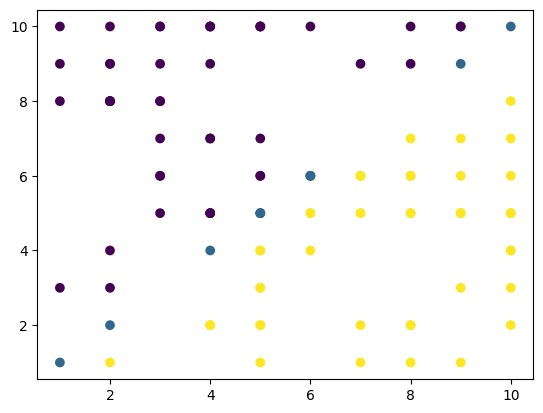

In [12]:
plt.scatter(df['Me'],df['Opponant'],c=df['Point'])

In [13]:
X =df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,Me,Opponant
0,9,5
1,7,1
2,9,10
3,6,5
4,4,4
...,...,...
95,4,10
96,7,6
97,5,3
98,2,10


In [15]:
y

,Point
0,3
1,3
2,0
3,3
4,1
...,...
95,0
96,3
97,3
98,0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [17]:
X_train

,Me,Opponant
37,9,5
24,10,5
81,6,6
72,5,5
85,10,10
...,...,...
56,10,5
3,6,5
99,10,8
93,3,8


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_test

array([[ 1.26667155, -0.31541092],
       [ 0.89282752,  0.04688541],
       [ 1.64051559, -1.40229991],
       [-1.35023669,  0.77147806],
       [ 1.26667155, -1.04000358],
       [ 1.26667155,  0.04688541],
       [-0.97639266,  0.04688541],
       [-0.22870459,  1.49607072],
       [-0.22870459,  1.49607072],
       [ 0.51898348, -0.31541092],
       [-1.35023669,  1.49607072],
       [-1.35023669,  0.77147806],
       [-1.35023669, -1.04000358],
       [ 0.89282752, -0.31541092],
       [ 1.64051559, -0.67770725]])

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
clf = MLPClassifier()

In [22]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

,Point
79,3
71,3
28,3
8,0
43,3
49,3
87,0
17,0
15,0
58,3


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

1.0

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

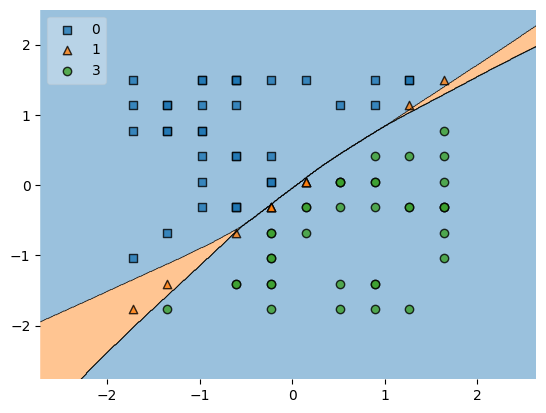

In [32]:
plot_decision_regions(X_train,y_train.values,clf=clf, legend=2)

In [33]:
import pickle

In [35]:
pickle.dump(clf,open('model.pkl','wb'))